# HR_Analysis


### Importing Data 

In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib
import scipy as stats
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [1]:
dataset = pd.read_csv("D:\OneDrive\Documents\Downloads\Intern\ibm-hr-analytics-employee-attrition-performance (1).zip")
dataset 

NameError: name 'pd' is not defined

## In all we have 34 features consisting of both the categorical as well as the numerical features. The target variable is the 'Attrition' of the employee which can be either a Yes or a No.

In [254]:
dataset.shape

(1470, 35)

In [255]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [256]:
dataset.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [257]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [258]:
# X=dataset.drop('Attrition',axis=1)
# y=dataset['Attrition']

In [259]:
# Now checking for numerical columns

numerical_col = []

for i in dataset.dtypes.index:
    if dataset.dtypes[i]!='object':
        numerical_col.append(i)

print(numerical_col)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [260]:
type(numerical_col)

list

In [261]:
dataset[numerical_col]

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [262]:
# for categorical columns

cat_columns = []

for i in dataset.dtypes.index:
    if dataset.dtypes[i]=='object':
        cat_columns.append(i)

print(cat_columns)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [263]:
dataset[cat_columns]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [264]:
# y=dataset['Attrition']


In [265]:
# Compute the correlation matrix
corr = dataset.corr()
corr.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='Age', ylabel='Density'>

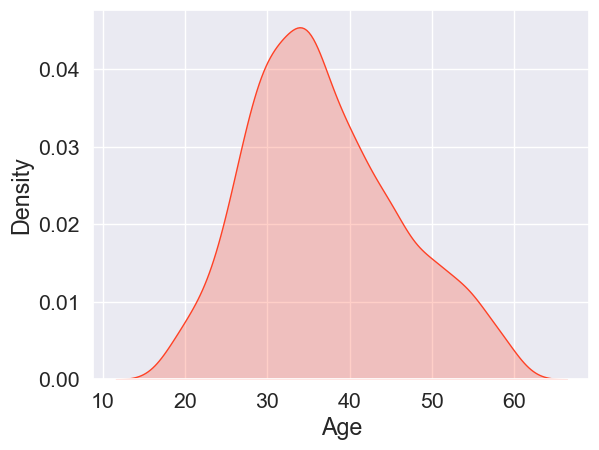

In [266]:
sns.kdeplot(dataset['Age'],shade=True,color='#ff4125')

In [267]:
dataset['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot: xlabel='Attrition', ylabel='count'>

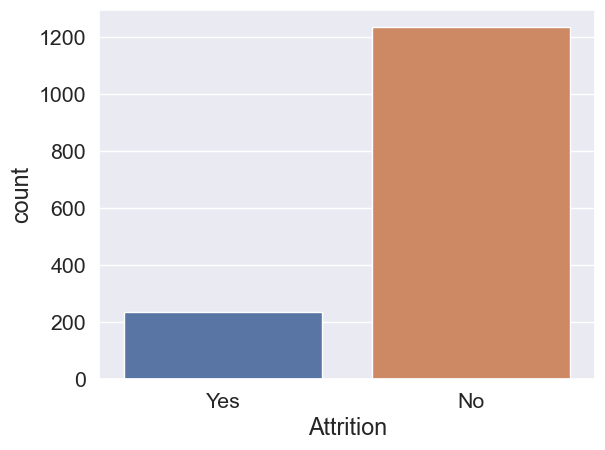

In [268]:
sns.countplot(x='Attrition', data=dataset)

In [269]:
dataset['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<AxesSubplot: xlabel='BusinessTravel', ylabel='count'>

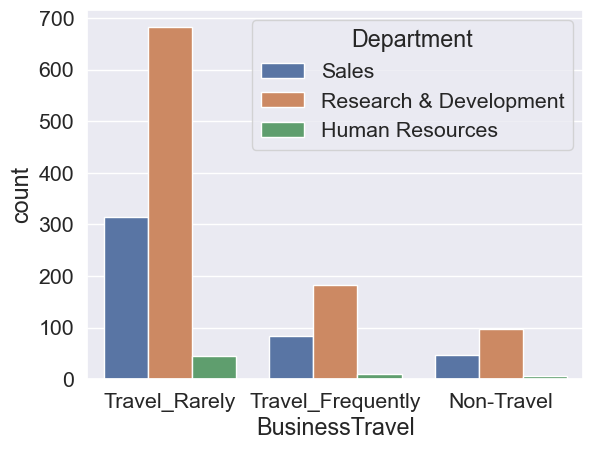

In [270]:
sns.countplot(x='BusinessTravel',hue='Department', data=dataset)

<AxesSubplot: xlabel='EducationField', ylabel='count'>

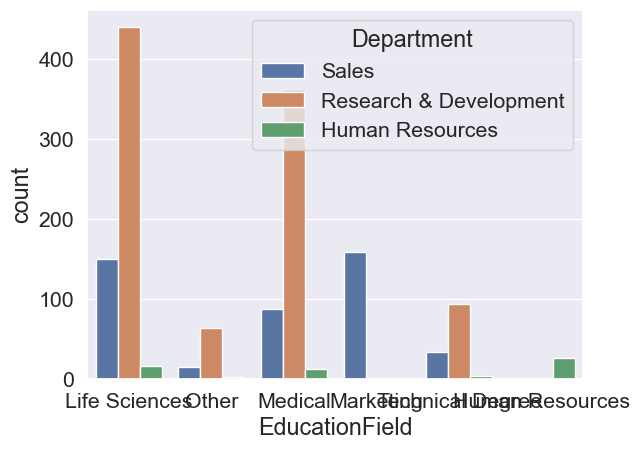

In [271]:
sns.countplot(x='EducationField',hue='Department', data=dataset)

Similarly we can continue for other categorical features.
Note that the same function can also be used to better analyze the numeric discrete features like 'Education' ,'JobSatisfaction' etc...

<AxesSubplot: xlabel='Age', ylabel='Density'>

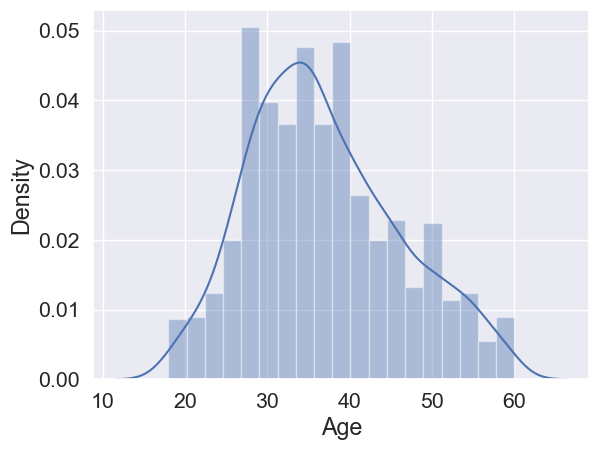

In [272]:
sns.distplot(dataset['Age'])

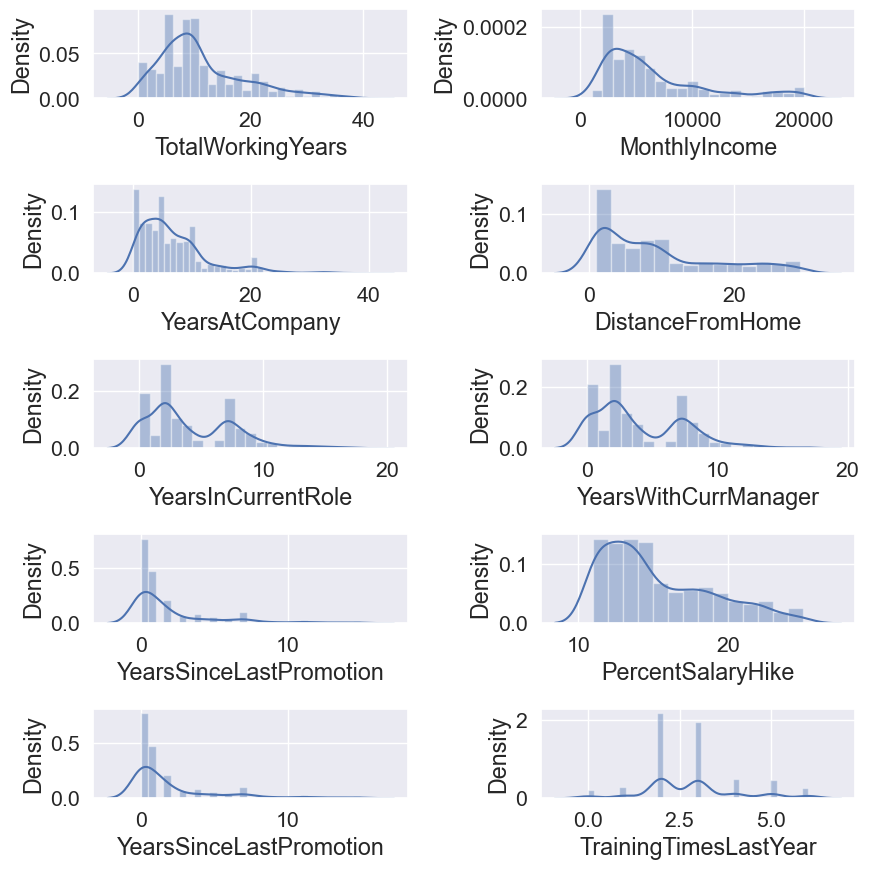

In [273]:
fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(dataset['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(dataset['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(dataset['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(dataset['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(dataset['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(dataset['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(dataset['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(dataset['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(dataset['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(dataset['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

Let us now analyze the various categorical features. Note that in these cases the best way is to use a count plot to show the relative count of observations of different categories.

In [274]:
lecode=LabelEncoder()
dataset[cat_columns]=dataset[cat_columns].apply(LabelEncoder().fit_transform)
dataset[cat_columns]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,2,2,1,0,7,2,0,1
1,0,1,1,1,1,6,1,0,0
2,1,2,1,4,1,2,2,0,1
3,0,1,1,1,0,6,1,0,1
4,0,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0,0
1466,0,2,1,3,1,0,1,0,0
1467,0,2,1,1,1,4,1,0,1
1468,0,1,2,3,1,7,1,0,0


In [275]:
cat=dataset[cat_columns].drop('Attrition',axis=1)
cat
# X=dataset.drop('Attrition',axis=1)
# y=dataset['Attrition']

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,2,2,1,0,7,2,0,1
1,1,1,1,1,6,1,0,0
2,2,1,4,1,2,2,0,1
3,1,1,1,0,6,1,0,1
4,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...
1465,1,1,3,1,2,1,0,0
1466,2,1,3,1,0,1,0,0
1467,2,1,1,1,4,1,0,1
1468,1,2,3,1,7,1,0,0


In [276]:
# # here we are using logarithmic transform

# for feature in conti_columns:
#     if 0 in dataset[feature].unique():
#         pass
#     else:
# #         df[feature]=np.log(df[feature])
# #         df['SalePrice']=np.log(df['SalePrice'])            #check this line 
#         plt.scatter(dataset[feature],df["SalePrice"])
#         plt.xlabel(feature)
#         plt.ylabel("SalePrice")
#         plt.title(feature)
#         plt.show()

In [277]:
dataset.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [278]:
corr = dataset[numerical_col].corr()
corr.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

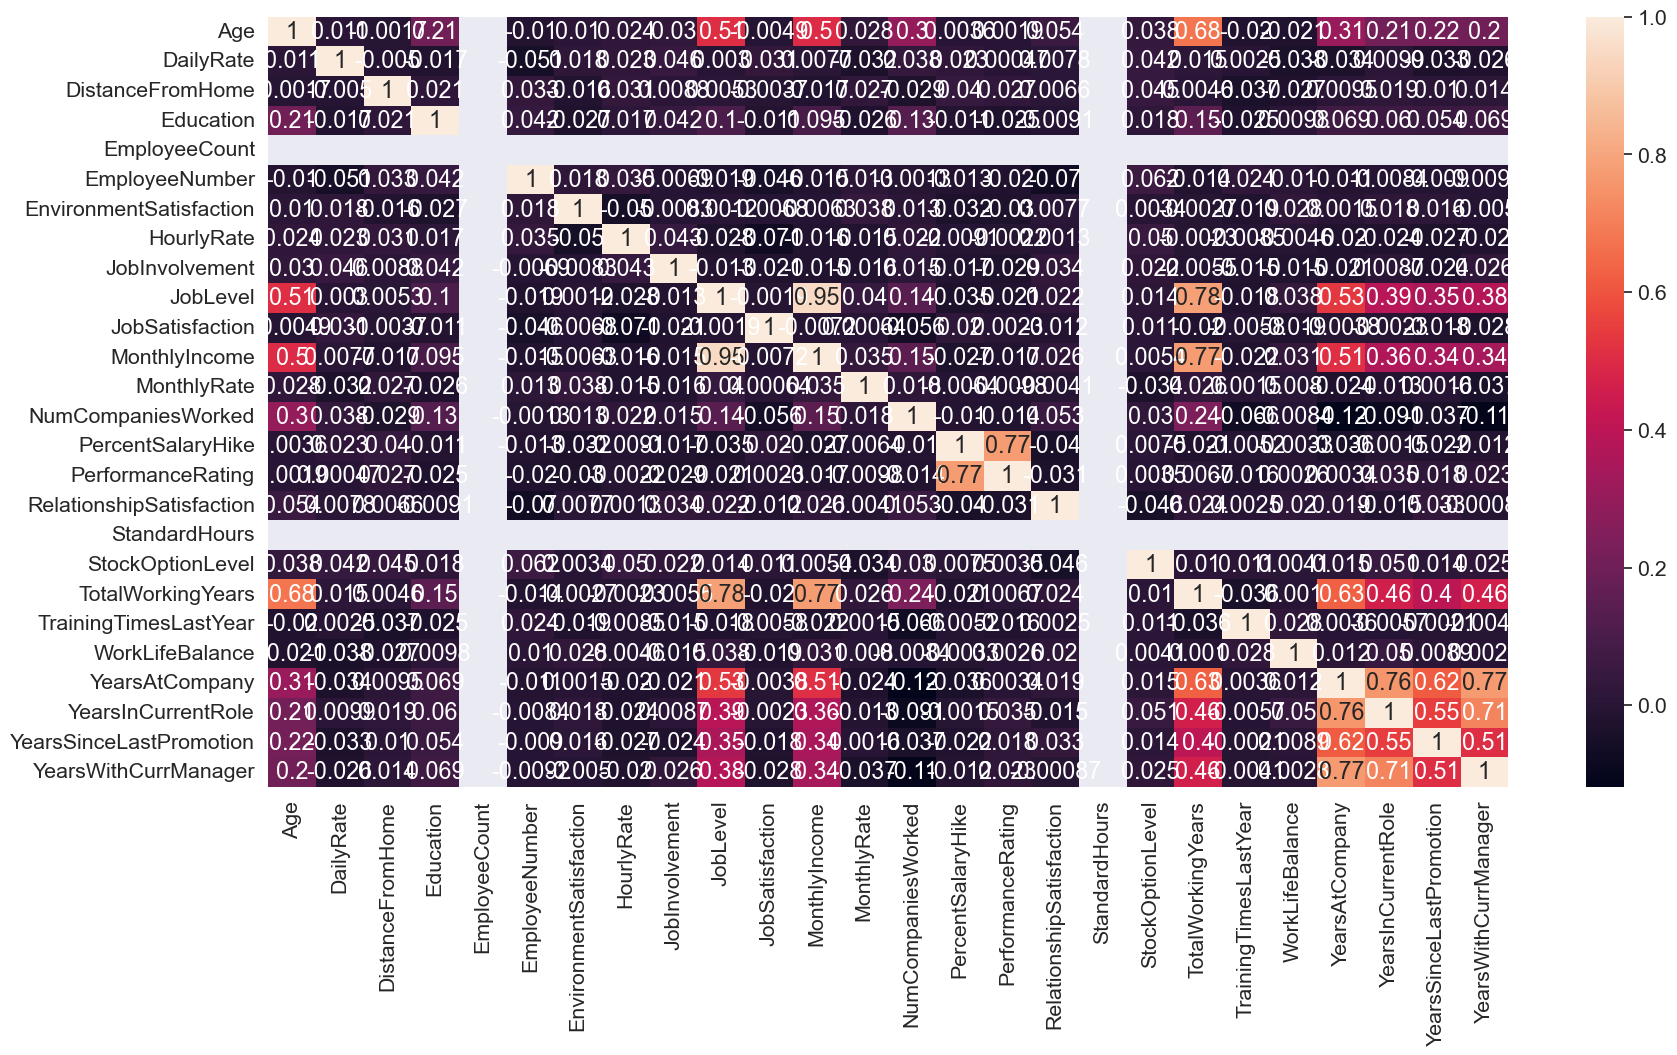

In [279]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True)

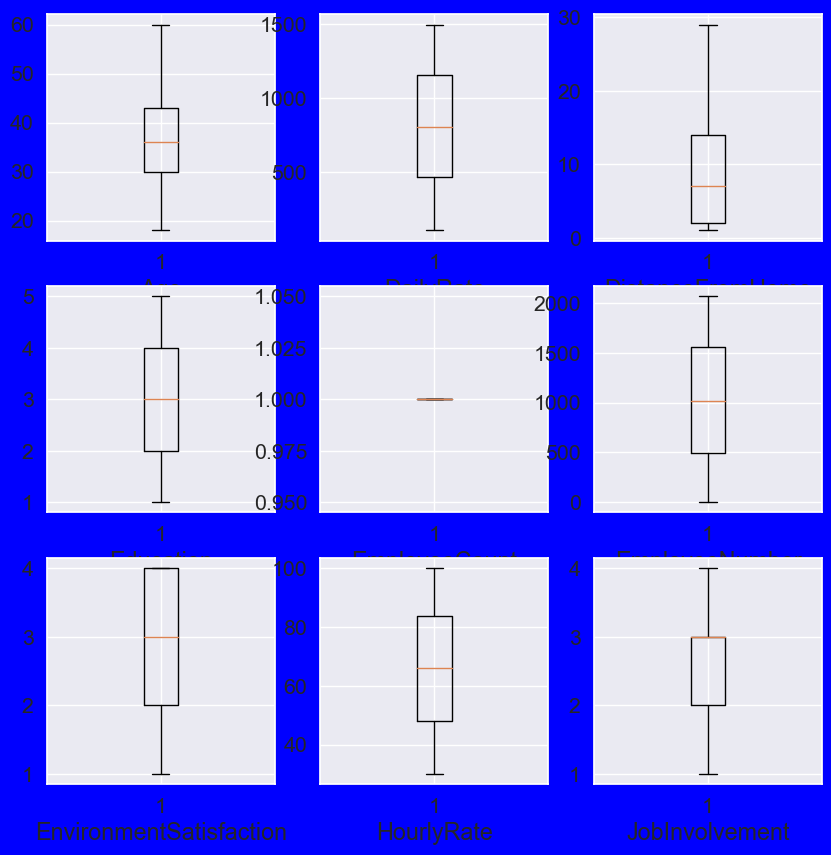

In [280]:
plt.figure(figsize=(10,10),facecolor="blue")
plotnumber=1
for i in dataset[numerical_col]:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.boxplot(dataset[numerical_col][i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

In [281]:
# # Distribution plot for target variable AveragePrice

# print(df["AveragePrice"].value_counts())

# plt.figure(figsize = (8, 6))

# sns.distplot(df["AveragePrice"], color = 'g')

# plt.show()

In [282]:
dataset[numerical_col].skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [283]:
# X=dataset.drop('Attrition',axis=1)
# y=dataset.Attrition

## For Removing skewness through log Transform

In [284]:
# for feature in dataset[numerical_col]:
#     if 0 in dataset[numerical_col]:
#         pass
#     else:
#         dataset[numerical_col]=np.abs(dataset[numerical_col])
#         sns.distplot(column=feature)
#         plt.ylabel(feature)
#         plt.title(feature)
#         plt.show()

In [285]:
Vif=pd.DataFrame()
Vif['Vif']=[variance_inflation_factor(dataset[numerical_col],i) for i in range(dataset[numerical_col].shape[1])]
Vif['features']=dataset[numerical_col].columns
Vif

,Vif,features
0,2.044997,Age
1,1.020863,DailyRate
2,1.016514,DistanceFromHome
3,1.061247,Education
4,0.000000,EmployeeCount
5,1.019558,EmployeeNumber
6,1.010565,EnvironmentSatisfaction
7,1.019212,HourlyRate
8,1.016367,JobInvolvement
9,11.208731,JobLevel


In [286]:
dataset=dataset.drop('JobLevel',axis=1)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [287]:
df=dataset.drop('Attrition',axis=1)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [288]:
y=dataset['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [289]:
# dataset[numerical_col]=dataset[numerical_col].drop('JobLevel',axis=1)

In [290]:
Vif=pd.DataFrame()
Vif['Vif']=[variance_inflation_factor(df,i) for i in range(df.shape[1])]
Vif['features']=df.columns
Vif

,Vif,features
0,2.052543,Age
1,1.015286,BusinessTravel
2,1.026098,DailyRate
3,1.849243,Department
4,1.014345,DistanceFromHome
5,1.065267,Education
6,1.015587,EducationField
7,0.000000,EmployeeCount
8,1.022384,EmployeeNumber
9,1.017349,EnvironmentSatisfaction


Now the VIF values have reduced within 10, this means Multicolinearity has been solved, lets start building model. Finding Best Random State

In [291]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df)
x_scaled

array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [292]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [293]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 0)
                                                    

In [294]:
print(x_train.shape)
print(y_train.shape)

(1176, 33)
(1176,)


In [295]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [296]:
lg_pred=lg.predict(x_test)
lg_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

In [297]:
lg.score(x_train,y_train)

0.8775510204081632

In [298]:
lg.score(x_test, y_test)

0.8741496598639455

In [299]:
print("MsE",mean_squared_error(y_test,lg_pred))

MsE 0.12585034013605442


In [300]:
print("MAE",mean_absolute_error(y_test,lg_pred))

MAE 0.12585034013605442


In [301]:
print('R2_Score:', r2_score(y_test, lg_pred))

R2_Score: 0.0938775510204084


In [302]:
# Checking Cross_Validation score for logistic Regression
print('Cross_Validaton_Score', cross_val_score(lg, x_scaled, y, cv = 5).mean())

Cross_Validaton_Score 0.8714285714285713


In [303]:
## DecisionTree

classifier = DecisionTreeClassifier(criterion="gini", max_depth=5,min_samples_split=2,  min_samples_leaf=1,random_state=42) 
classifier.fit(x_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['DecisionTree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.846939,0.590909,0.265306,0.366197


In [304]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(x_train, y_train)

# Predicting Test Set
random_pred = classifier.predict(x_test)
acc = accuracy_score(y_test, random_pred)
prec = precision_score(y_test, random_pred)
rec = recall_score(y_test, random_pred)
f1 = f1_score(y_test, random_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.846939,0.590909,0.265306,0.366197
1,Random Forest (n=100),0.850340,0.727273,0.163265,0.266667


In [305]:
## AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(random_state = 0, n_estimators = 100)
                                    
classifier.fit(x_train, y_train)

# Predicting Test Set
ada_pred = classifier.predict(x_test)
acc = accuracy_score(y_test, ada_pred)
prec = precision_score(y_test, ada_pred)
rec = recall_score(y_test, ada_pred)
f1 = f1_score(y_test, ada_pred)

model_results = pd.DataFrame([['AdaBoostClassifiet (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.846939,0.590909,0.265306,0.366197
1,Random Forest (n=100),0.850340,0.727273,0.163265,0.266667
2,AdaBoostClassifiet (n=100),0.850340,0.631579,0.244898,0.352941


In [306]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier( n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   random_state =5)
classifier.fit(x_train, y_train)

# Predicting Test Set
g_pred = classifier.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['GradientBoostingclassifier (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.846939,0.590909,0.265306,0.366197
1,Random Forest (n=100),0.850340,0.727273,0.163265,0.266667
2,AdaBoostClassifiet (n=100),0.850340,0.631579,0.244898,0.352941
3,GradientBoostingclassifier (n=100),0.846939,0.590909,0.265306,0.366197


In [307]:
import xgboost as xgb
classifier = xgb.XGBClassifier(max_depth=2, n_estimators=5000, 
learning_rate=0.05)
                                 
classifier.fit(x_train, y_train)

# Predicting Test Set
c_pred = classifier.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['xgboost (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.846939,0.590909,0.265306,0.366197
1,Random Forest (n=100),0.850340,0.727273,0.163265,0.266667
2,AdaBoostClassifiet (n=100),0.850340,0.631579,0.244898,0.352941
3,GradientBoostingclassifier (n=100),0.846939,0.590909,0.265306,0.366197
4,xgboost (n=100),0.846939,0.590909,0.265306,0.366197


In [308]:
## K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= x_train, y = y_train,
                             cv = 10)
print("Xgboost: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Xgboost: 0.86 (+/- 0.04)


Test Data Accuracy: 0.8469


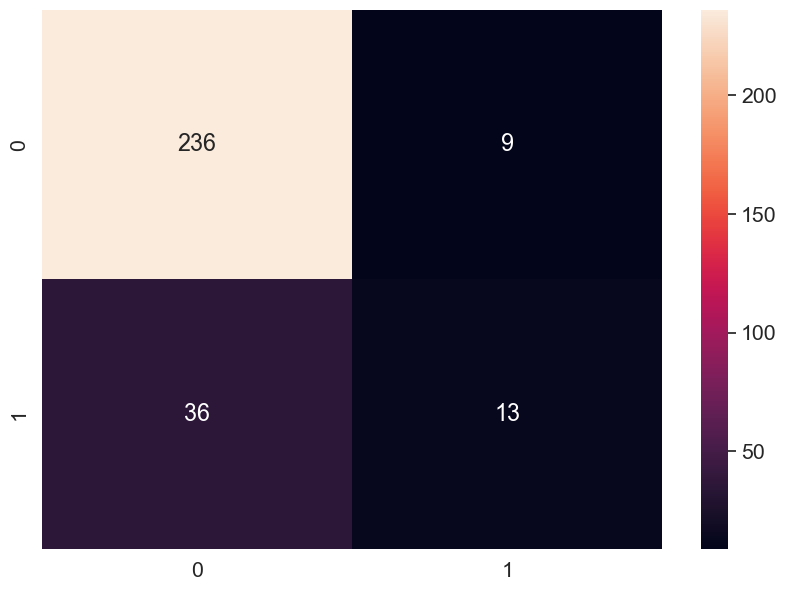

In [309]:
## EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [310]:
# Applying Grid Search
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('logistic', 'rbf','linear'), 'C':[1, 10]}
svc = svm.SVC()
sv = GridSearchCV(svc, parameters)
sv.fit(x_train, y_train)
print(sv.best_params_)


{'C': 10, 'kernel': 'linear'}


In [311]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.846939,0.590909,0.265306,0.366197
1,Random Forest (n=100),0.850340,0.727273,0.163265,0.266667
2,AdaBoostClassifiet (n=100),0.850340,0.631579,0.244898,0.352941
3,GradientBoostingclassifier (n=100),0.846939,0.590909,0.265306,0.366197
4,xgboost (n=100),0.846939,0.590909,0.265306,0.366197


In [312]:
# Predicting Test Set
svm_pred = sv.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (n=100, GSx2 + entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.846939,0.590909,0.265306,0.366197
1,Random Forest (n=100),0.850340,0.727273,0.163265,0.266667
2,AdaBoostClassifiet (n=100),0.850340,0.631579,0.244898,0.352941
3,GradientBoostingclassifier (n=100),0.846939,0.590909,0.265306,0.366197
4,xgboost (n=100),0.846939,0.590909,0.265306,0.366197
5,"SVM (n=100, GSx2 + entropy)",0.846939,0.590909,0.265306,0.366197


Test Data Accuracy: 0.8469


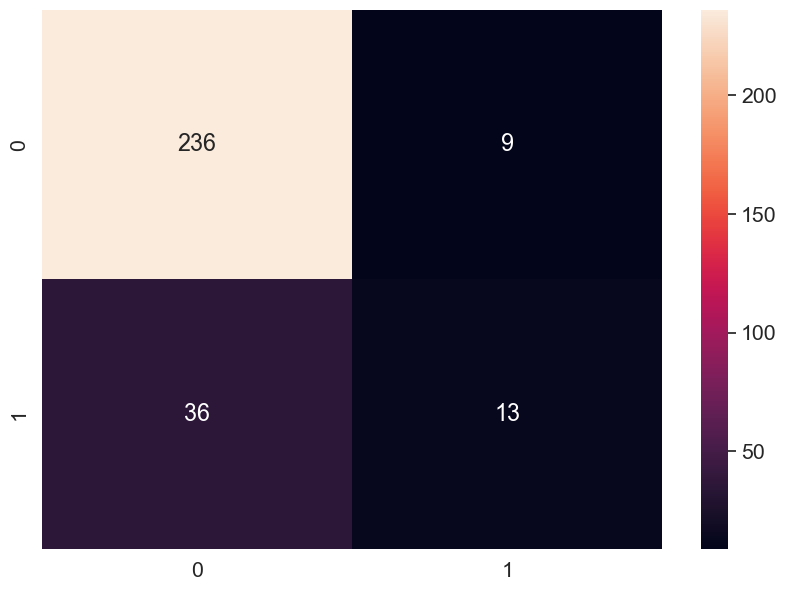

In [313]:
## EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [314]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       245
           1       0.59      0.27      0.37        49

    accuracy                           0.85       294
   macro avg       0.73      0.61      0.64       294
weighted avg       0.82      0.85      0.82       294



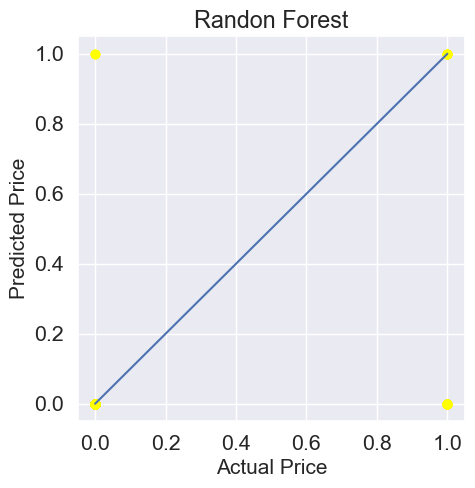

In [315]:
plt.figure(figsize=(5, 5))

plt.scatter(y_test, random_pred, c ='Yellow')

plt1 = max(max(random_pred), max(y_test))

plt2 = min(min(random_pred), min(y_test))

plt.plot([plt1, plt2], [plt1, plt2], 'b-')

plt.title('Randon Forest')

plt.xlabel('Actual Price', fontsize = 15)

plt.ylabel('Predicted Price', fontsize = 15)

plt.show()

In [316]:
import pickle
filename='HR Attrition Analysis.pkl'
pickle.dump(lg, open(filename, 'wb'))

In [317]:
loaded_model = pickle.load(open('HR Attrition Analysis.pkl', 'rb'))
result = lg.score(x_test,y_test)
print(result*100)

87.41496598639455


In [318]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],random_pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,284,285,286,287,288,289,290,291,292,293
Predicted,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Original,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
